In [80]:
import pandas as pd
from fuzzywuzzy import fuzz
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [226]:
class tidy_df():
    def __init__(self):
        self.indices = None
        self.values = list()
        
    
    def set_indices(self, 
                    df: pd.DataFrame, 
                    col_locs: tuple, 
                    header_row: int) -> None:
        
        start, end = col_locs
        ind_df = df.iloc[header_row+1:,start:end+1]
        print(ind_df.columns)
        ind_df.columns = df.iloc[header_row,start:end+1]
        ind_df.reset_index(inplace=True, drop=True)
        self.indices = ind_df
        return None
 
    def set_values(self, df: pd.DataFrame, header_row: int, 
                   col_start: int, col_width: int, coverage_type: str) -> None:
        
        col_names = list(df.iloc[header_row+1,col_start:col_start + col_width])
        print(col_names)
        i = col_start
        
        
        
        while i < len(df.columns) - col_start:
            
            temp_df = df.iloc[header_row+2:, i:i+col_width]
            temp_df.columns = col_names
            
            temp_df.reset_index(inplace=True, drop=True)
            joined_df = pd.concat([self.indices, temp_df], axis=1)
            joined_df['year'] = df.iloc[header_row,i]
            joined_df['coverage_type'] = coverage_type.lower()
            
            self.values.append(joined_df)
            i += col_width
        return None

    def glue(self):
        tidier_df = pd.concat(self.values, ignore_index=True, axis=0)
        return tidier_df

In [237]:
filename1 = "data/DSD_MCD_R21_DYT20_Web.xlsx"
filename2 = "data/DSD_MCD_R17_DYT16_Web.xlsx"
filename3 = "data/DSD_PTD_R21_DYT20_Web.xlsx"
filename4 = "data/DSD_PTD_R17_DYT16_Web.xlsx"

mcd_costs_20 = pd.read_excel(filename1, sheet_name=1, skiprows=1).iloc[:,:-2]
mcd_costs_16 = pd.read_excel(filename2, sheet_name=1, skiprows=1).iloc[:,:-2]
mcr_costs_20 = pd.read_excel(filename3, sheet_name=1, skiprows=1).iloc[:,:-2]
mcr_costs_16 = pd.read_excel(filename4, sheet_name=1, skiprows=1).iloc[:,:-2]
    
dataframe_dict = {"medicaid": [mcd_costs_16, mcd_costs_20], "medicare": [mcr_costs_16, mcr_costs_20]}

tidy = tidy_df()

tidy.set_indices(mcd_costs_20, (0,2), 1)
tidy.set_values(mcd_costs_20, 0, 3, 6, 'medicaid')
    
tidy.set_indices(mcd_costs_16, (0,2), 1)
tidy.set_values(mcd_costs_16, 0, 3, 5, 'medicaid')

tidy.set_indices(mcr_costs_20, (0,2), 1)
tidy.set_values(mcr_costs_20, 0, 3, 8, 'medicare')

tidy.set_indices(mcr_costs_16, (0,2), 1)
tidy.set_values(mcr_costs_16, 0, 3, 7, 'medicare')



Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
['Total Spending', 'Total Dosage Units', 'Total Claims', 'Average Spending Per Dosage Unit (Weighted)', 'Average Spending Per Claim', 'Outlier Flag']
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
['Total Spending', 'Total Dosage Units', 'Total Claims', 'Average Spending Per Dosage Unit (Weighted)', 'Average Spending Per Claim']
Index(['*Average spending per dosage unit reflects multiple routes of administration of the drug (e.g., intravenous, subcutaneous) which individually may have different unit pricing. Additional information regarding calculation of spending per unit can be found in the methodology document.',
       'Unnamed: 1', 'Unnamed: 2'],
      dtype='object')
['Total Spending', 'Total Dosage Units', 'Total Claims', 'Total \nBeneficiaries', 'Average Spending Per Dosage Unit (Weighted)', 'Average \nSpending Per Claim', 'Average \nSpending Per Beneficiary', 'Outlier \nFlag']
Index(['Unnamed:

In [245]:
new_list = []
cols_to_keep = ['Brand Name', 
                'Generic Name', 
                'Number of Manufacturers',
                'Total Spending', 
                'Total Dosage Units', 
                'Total Claims',
                'Average Spending Per Dosage Unit (Weighted)',
                'Average Spending Per Claim',
                'year', 
                'coverage_type']
for df in tidy.values:
    if 'Average \nSpending Per Claim' in df.columns:
        print("found it")
        df['Average Spending Per Claim'] = df['Average \nSpending Per Claim']
    print(df.columns)
    
    new_list.append(df[cols_to_keep])

tidy.values = new_list

Index(['Brand Name', 'Generic Name', 'Number of Manufacturers',
       'Total Spending', 'Total Dosage Units', 'Total Claims',
       'Average Spending Per Dosage Unit (Weighted)',
       'Average Spending Per Claim', 'Outlier Flag', 'year', 'coverage_type'],
      dtype='object')
Index(['Brand Name', 'Generic Name', 'Number of Manufacturers',
       'Total Spending', 'Total Dosage Units', 'Total Claims',
       'Average Spending Per Dosage Unit (Weighted)',
       'Average Spending Per Claim', 'Outlier Flag', 'year', 'coverage_type'],
      dtype='object')
Index(['Brand Name', 'Generic Name', 'Number of Manufacturers',
       'Total Spending', 'Total Dosage Units', 'Total Claims',
       'Average Spending Per Dosage Unit (Weighted)',
       'Average Spending Per Claim', 'Outlier Flag', 'year', 'coverage_type'],
      dtype='object')
Index(['Brand Name', 'Generic Name', 'Number of Manufacturers',
       'Total Spending', 'Total Dosage Units', 'Total Claims',
       'Average Spending Pe

In [250]:
cleaned_df = tidy.glue()
cleaned_df['year'] = cleaned_df['year'].apply(lambda x: int(x[-4:]))

In [255]:
cleaned_df[cleaned_df['Brand Name']=='Zytiga']

,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Average Spending Per Dosage Unit (Weighted),Average Spending Per Claim,year,coverage_type
4392,Zytiga,Abiraterone Acetate,2,32131449.1,458316,4080,70.107631,7875.355172,2016,medicaid
8787,Zytiga,Abiraterone Acetate,2,49068876.2,600610,5646,85.529176,8690.909706,2017,medicaid
13182,Zytiga,Abiraterone Acetate,2,84519375.17,887417,9362,105.687873,9027.918732,2018,medicaid
17577,Zytiga,Abiraterone Acetate,2,49624933.74,344872,4850,158.548347,10231.945101,2019,medicaid
21972,Zytiga,Abiraterone Acetate,2,34807960.04,227767,3414,162.801128,10195.653204,2020,medicaid
25336,Zytiga,Abiraterone Acetate,1,9457305.52,196860.76,1744,48.040582,5422.766927,2012,medicaid
28699,Zytiga,Abiraterone Acetate,1,19766333.78,366342,3217,53.955959,6144.337513,2013,medicaid
32062,Zytiga,Abiraterone Acetate,1,24816838.78,420892,3703,58.962486,6701.819816,2014,medicaid
35425,Zytiga,Abiraterone Acetate,1,27705169.47,427836.24,3758,64.756481,7372.317581,2015,medicaid
38788,Zytiga,Abiraterone Acetate,1,31299543.91,446350,3973,70.12332,7878.062902,2016,medicaid


In [5]:
drug_info = pd.read_excel(filename1, sheet_name=3, skiprows=4, header=0)

In [9]:
drug_info.loc[5]

Brand Name                                            A-Methapred
Generic Name                          Methylprednisolone Sod Succ
Drug Uses*      This medication is used to treat conditions su...
Name: 5, dtype: object

In [77]:
def get_drug_info(search_str: str):
    words = list()
    for row in drug_info.iterrows():
        rat = fuzz.partial_ratio(search_str, str(row[1][1]))
        if rat >=75:
            words.append(row[1][2])
    return words
        

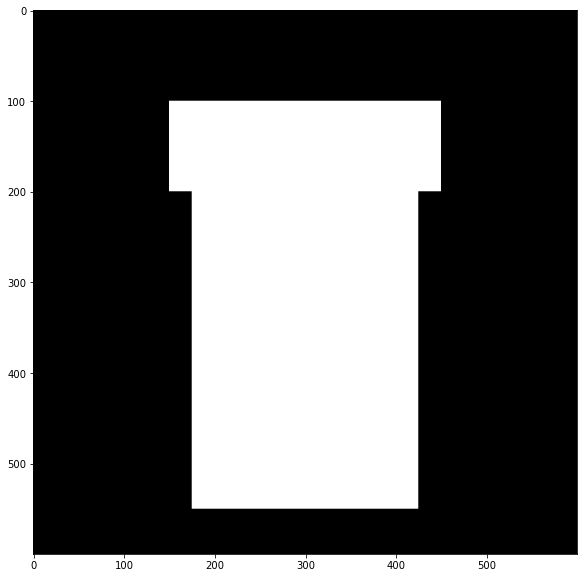

In [184]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray', vmin=0, vmax=1)
    
bottle = np.zeros((600,600),dtype=np.int8)

bottle[100:200,150:450]=1
bottle[100:550, 175:425]=1

display_img(bottle)

In [190]:
import time
time.gmtime(time.time())

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=14, tm_hour=18, tm_min=2, tm_sec=40, tm_wday=0, tm_yday=73, tm_isdst=0)

In [257]:

filename1 = "data/DSD_PTD_R21_DYT20_Web.xlsx"
filename2 = "data/DSD_MCD_R21_DYT20_Web.xlsx"


drug_info_mcr = pd.read_excel(filename1, sheet_name=3, skiprows=4, header=0)

drug_info_mcd = pd.read_excel(filename2, sheet_name=3, skiprows=4, header=0)

print(drug_info_mcr.columns)
print(drug_info_mcd.columns)


Index(['Brand Name', 'Generic Name', 'Drug Uses**'], dtype='object')
Index(['Brand Name', 'Generic Name', 'Drug Uses*'], dtype='object')
